### Imports

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data ingest

In [3]:
df = pd.read_csv('./data_in/USW00093134_2023-03-26-1800.csv')

print(df.shape)
print(df.columns)
display(df.head())
display(df.tail())

(292500, 8)
Index(['USW00093134', '19060401', 'TMAX', '161', 'Unnamed: 4', 'Unnamed: 5',
       '6', '2400'],
      dtype='object')


,USW00093134,19060401,TMAX,161,Unnamed: 4,Unnamed: 5,6,2400
0,USW00093134,19060402,TMAX,183,NaN,NaN,6,2400.0
1,USW00093134,19060403,TMAX,189,NaN,NaN,6,2400.0
2,USW00093134,19060404,TMAX,178,NaN,NaN,6,2400.0
3,USW00093134,19060405,TMAX,189,NaN,NaN,6,2400.0
4,USW00093134,19060406,TMAX,156,NaN,NaN,6,2400.0


,USW00093134,19060401,TMAX,161,Unnamed: 4,Unnamed: 5,6,2400
292495,USW00093134,20230323,WT01,1,NaN,NaN,W,NaN
292496,USW00093134,20230305,WT08,1,NaN,NaN,W,NaN
292497,USW00093134,20230308,WT08,1,NaN,NaN,W,NaN
292498,USW00093134,20230319,WT08,1,NaN,NaN,W,NaN
292499,USW00093134,20230321,WT08,1,NaN,NaN,W,NaN


### Data prep

In [4]:
df.columns = ['station', 'date', 'quantity', 'value', 'detail1', 'detail2', 'detail3', 'detail4']
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df.sort_values(by='date')
df = df.reset_index(drop=True)

In [5]:
print(df.shape)
print(df.columns)
display(df.head())
display(df.tail())

(292500, 8)
Index(['station', 'date', 'quantity', 'value', 'detail1', 'detail2', 'detail3',
       'detail4'],
      dtype='object')


,station,date,quantity,value,detail1,detail2,detail3,detail4
0,USW00093134,1906-04-01,TMIN,89,NaN,NaN,6,2400.0
1,USW00093134,1906-04-02,TMAX,183,NaN,NaN,6,2400.0
2,USW00093134,1906-04-02,TMIN,67,NaN,NaN,6,2400.0
3,USW00093134,1906-04-03,TMAX,189,NaN,NaN,6,2400.0
4,USW00093134,1906-04-03,TMIN,83,NaN,NaN,6,2400.0


,station,date,quantity,value,detail1,detail2,detail3,detail4
292495,USW00093134,2023-03-23,AWND,6,NaN,NaN,W,NaN
292496,USW00093134,2023-03-23,WDF2,260,NaN,NaN,W,NaN
292497,USW00093134,2023-03-23,WT01,1,NaN,NaN,W,NaN
292498,USW00093134,2023-03-23,WDF5,270,NaN,NaN,W,NaN
292499,USW00093134,2023-03-23,WSF5,76,NaN,NaN,W,NaN


In [6]:
df['quantity'].value_counts()

TMIN    39832
TMAX    39819
PRCP    39482
SNOW    17168
SNWD    17017
AWND     8624
WSF2     8619
WDF2     8610
WSF5     8523
WDF5     8505
WT08     8425
RHMX     6035
RHMN     6035
RHAV     6035
AWBT     5989
ADPT     5989
ASTP     5963
ASLP     5963
TSUN     5547
ACSH     4687
WSFM     4649
WDFM     4649
FMTM     4503
PSUN     4472
PGTM     4444
WT01     4029
WT16     3086
TAVG     2662
WT13     1960
WT07      466
WT02      182
WT05      127
WSFG      124
WDFG      121
WT03       84
TOBS       30
WT09       20
WESD       11
WT18       10
WT04        2
WT19        1
WT14        1
Name: quantity, dtype: int64

### Pivot the dataframe

In [7]:
df_noaa = df.copy()

In [8]:
df_noaa_daily = df_noaa.pivot(index='date', columns='quantity', values='value')
df_noaa_daily = df_noaa_daily.reset_index()
df_noaa_daily['date'] = pd.to_datetime(df_noaa_daily['date'])
df_noaa_daily = df_noaa_daily.sort_values(by='date')
df_noaa_daily = df_noaa_daily.reset_index(drop=True)

display(df_noaa.head(2))
display(df_noaa_daily.head(3))
display(df_noaa_daily.tail(3))

,station,date,quantity,value,detail1,detail2,detail3,detail4
0,USW00093134,1906-04-01,TMIN,89,NaN,NaN,6,2400.0
1,USW00093134,1906-04-02,TMAX,183,NaN,NaN,6,2400.0


quantity,date,ACSH,ADPT,ASLP,ASTP,AWBT,AWND,FMTM,PGTM,PRCP,...,WT04,WT05,WT07,WT08,WT09,WT13,WT14,WT16,WT18,WT19
0,1906-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1906-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1906-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


quantity,date,ACSH,ADPT,ASLP,ASTP,AWBT,AWND,FMTM,PGTM,PRCP,...,WT04,WT05,WT07,WT08,WT09,WT13,WT14,WT16,WT18,WT19
40079,2023-03-21,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,363.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40080,2023-03-22,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40081,2023-03-23,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select features of interest, unit conversions

In [9]:
df_noaa_daily.columns

Index(['date', 'ACSH', 'ADPT', 'ASLP', 'ASTP', 'AWBT', 'AWND', 'FMTM', 'PGTM',
       'PRCP', 'PSUN', 'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF2',
       'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07',
       'WT08', 'WT09', 'WT13', 'WT14', 'WT16', 'WT18', 'WT19'],
      dtype='object', name='quantity')

https://docs.opendata.aws/noaa-ghcn-pds/readme.html   
  
As mentioned above the five core elements are:  

PRCP = Precipitation (tenths of mm)  
SNOW = Snowfall (mm)  
SNWD = Snow depth (mm)   
TMAX = Maximum temperature (tenths of degrees C)   
TMIN = Minimum temperature (tenths of degrees C)     
     
The other elements are:    
. . .    
ACMC = Average cloudiness midnight to midnight from 30-second ceilometer data (percent)   
ACMH = Average cloudiness midnight to midnight from manual observations (percent)   
ACSC = Average cloudiness sunrise to sunset from 30-second ceilometer data (percent)   
ACSH = Average cloudiness sunrise to sunset from manual observations (percent)
AWDR = Average daily wind direction (degrees)   
AWND = Average daily wind speed (tenths of meters per second)   
DAEV = Number of days included in the multiday evaporation total (MDEV)   
DAPR = Number of days included in the multiday precipitation total (MDPR)   
DASF = Number of days included in the multiday snowfall total (MDSF)   
DATN = Number of days included in the multiday minimum temperature (MDTN)   
DATX = Number of days included in the multiday maximum temperature (MDTX)   
DAWM = Number of days included in the multiday wind movement (MDWM)   
DWPR = Number of days with non-zero precipitation included in multiday precipitation total (MDPR)   
EVAP = Evaporation of water from evaporation pan (tenths of mm)   
FMTM = Time of fastest mile or fastest 1-minute wind (hours and minutes,i.e., HHMM)   
FRGB = Base of frozen ground layer (cm)   
FRGT = Top of frozen ground layer (cm)   
. . . (many more)   

In [10]:
display(df_noaa_daily[['date', 'TMAX', 'TMIN', 'AWND', 'PRCP']].head(3))
display(df_noaa_daily[['date', 'TMAX', 'TMIN', 'AWND', 'PRCP']].tail(3))

quantity,date,TMAX,TMIN,AWND,PRCP
0,1906-04-01,NaN,89.0,NaN,NaN
1,1906-04-02,183.0,67.0,NaN,NaN
2,1906-04-03,189.0,83.0,NaN,NaN


quantity,date,TMAX,TMIN,AWND,PRCP
40079,2023-03-21,167.0,89.0,23.0,363.0
40080,2023-03-22,156.0,83.0,12.0,84.0
40081,2023-03-23,167.0,106.0,6.0,5.0


In [11]:
df_noaa_daily['TMAX_C'] = df_noaa_daily['TMAX'] / 10
df_noaa_daily['TMAX_F'] = (df_noaa_daily['TMAX_C'] * (9/5) ) + 32

df_noaa_daily['TMIN_C'] = df_noaa_daily['TMIN'] / 10
df_noaa_daily['TMIN_F'] = (df_noaa_daily['TMIN_C'] * (9/5) ) + 32

df_noaa_daily['AWND_ms'] = df_noaa_daily['AWND'] / 10   # AWND = Average daily wind speed (tenths of meters per second)
df_noaa_daily['AWND_mph'] = df_noaa_daily['AWND_ms'] * 2.23694  # to mph

df_noaa_daily['PRCP_mm'] = df_noaa_daily['PRCP'] / 10  # PRCP = Precipitation (tenths of mm)
df_noaa_daily['PRCP_in'] = df_noaa_daily['PRCP_mm'] / 25.4

df_noaa_daily['SNOW_in'] = df_noaa_daily['SNOW'] / 25.4 # SNOW = Snowfall (mm)

In [12]:
display(df_noaa_daily[['date', 'TMAX_F', 'TMIN_F', 'AWND_mph', 'PRCP_in', 'SNOW_in']].head(3))
display(df_noaa_daily[['date', 'TMAX_F', 'TMIN_F', 'AWND_mph', 'PRCP_in', 'SNOW_in']].tail(3))

quantity,date,TMAX_F,TMIN_F,AWND_mph,PRCP_in,SNOW_in
0,1906-04-01,NaN,48.02,NaN,NaN,NaN
1,1906-04-02,64.94,44.06,NaN,NaN,NaN
2,1906-04-03,66.02,46.94,NaN,NaN,NaN


quantity,date,TMAX_F,TMIN_F,AWND_mph,PRCP_in,SNOW_in
40079,2023-03-21,62.06,48.02,5.144962,1.429134,NaN
40080,2023-03-22,60.08,46.94,2.684328,0.330709,NaN
40081,2023-03-23,62.06,51.08,1.342164,0.019685,NaN


### Basic viz

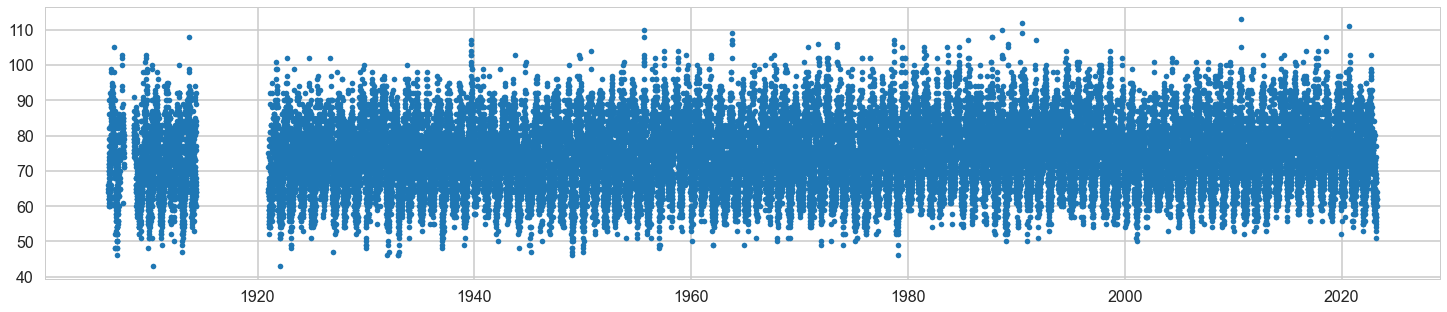

In [13]:
plt.figure(figsize=(25,5))

plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.plot(df_noaa_daily['date'], df_noaa_daily['TMAX_F'], '.')

(18993.0, 19448.0)

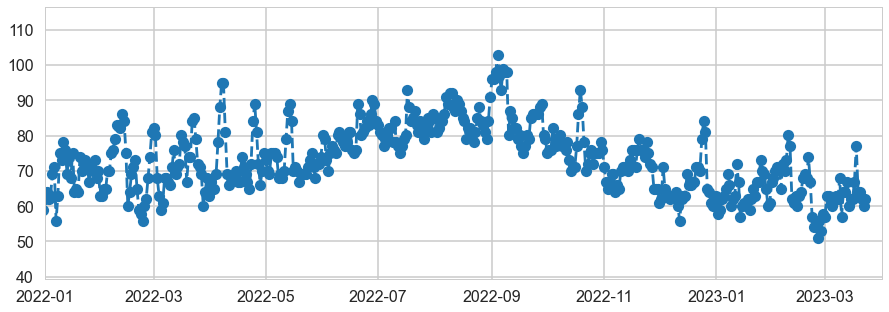

In [15]:
plt.figure(figsize=(15,5))

plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.plot(df_noaa_daily['date'], df_noaa_daily['TMAX_F'], 'o--')

plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-04-01'))

### Data export

In [16]:
df_extract1 = df_noaa_daily[['date', 'TMAX_F', 'TMIN_F', 'AWND_mph', 'PRCP_in', 'SNOW_in']]

In [17]:
df_extract1.columns = ['Date', 'TMAX_Fahrenheit', 'TMIN_Fahrenheit', 'AWND_mph', 'PRCP_inch', 'SNOW_inch']
df_extract1

,Date,TMAX_Fahrenheit,TMIN_Fahrenheit,AWND_mph,PRCP_inch,SNOW_inch
0,1906-04-01,NaN,48.02,NaN,NaN,NaN
1,1906-04-02,64.94,44.06,NaN,NaN,NaN
2,1906-04-03,66.02,46.94,NaN,NaN,NaN
3,1906-04-04,64.04,51.98,NaN,0.299213,NaN
4,1906-04-05,66.02,50.00,NaN,0.598425,NaN
...,...,...,...,...,...,...
40077,2023-03-19,64.04,53.96,3.131716,0.098425,NaN
40078,2023-03-20,64.04,53.96,1.342164,0.129921,NaN
40079,2023-03-21,62.06,48.02,5.144962,1.429134,NaN
40080,2023-03-22,60.08,46.94,2.684328,0.330709,NaN


In [18]:
df_extract1.to_csv('extract1_dtla_wth1.csv', index=False)

### Next steps

Future activity: Change point detection (one of many activities), for context see https://www.nasa.gov/vision/earth/lookingatearth/weather-20070117.html